<h1>
<center>CFRM 421/521, Spring 2022</center>
</h1>

<h1>
<center>Wendy Jiang</center>
</h1>

<h1>
<center>Homework 2</center>
</h1>

* **Due: Monday, May 2, 2022, 11:59 PM**


* Total marks: 41


* Late submissions are allowed, but a 20% penalty per day applies. Your last submission is considered for calculating the penalty.


*  Use this Jupyter notebook as a template for your solutions. **Your solution must be submitted as one Jupyter notebook on Canvas and one PDF file on Gradescope.** The notebook must be already run, that is, make sure that you have run all your code, save the notebook, and then when you reopen the notebook, checked that all output appears as expected. You are allowed to use code from the textbook, textbook website, or lecture notes.

# 1. Random forest for time series data [13 marks]

In this question you will work with the NYSE dataset. Only 3 time series in this dataset will be use: `DJ_return` ($a_t$), `log_volatility` ($b_t$), and `log_volume` ($c_t$). Download the data as a csv file from [Canvas](https://canvas.uw.edu/files/91091313/download?download_frd=1). The data was originally obtained from the R library ISLR2, and you can read the documentation for the dataset [here](https://cran.rstudio.com/web/packages/ISLR2/ISLR2.pdf), which explains the meaning of the variables.

You want to predict the 1-step ahead value of `log_volume` $c_{t+1}$ using the previous values of this variable and the other two variables (`DJ_return` and `log_volatility`) up to 5 lags. So the features are $c_{t},\dots,c_{t-4},b_{t},\dots,b_{t-4},a_{t},\dots,a_{t-4}$.

If the data is stored in a file named `NYSE.csv` in your working directory, then loading the data can be done using the code below.

In [160]:
import os
import pandas as pd
data = pd.read_csv("NYSE.csv")

## (a) [3 marks]

Create the feature matrix `X` and the target variable `y`. Print at least the first 2 rows of `X` and `y` (it is acceptable that not every element of the rows are printed).

**[Add your solution here]**

In [206]:
data.head()

,date,day_of_week,DJ_return,log_volume,log_volatility,train
0,1962-12-03,mon,-0.004461,0.032573,-13.127403,True
1,1962-12-04,tues,0.007813,0.346202,-11.749305,True
2,1962-12-05,wed,0.003845,0.525306,-11.665609,True
3,1962-12-06,thur,-0.003462,0.210182,-11.626772,True
4,1962-12-07,fri,0.000568,0.044187,-11.728130,True


In [207]:
data1 = data[['DJ_return','log_volume','log_volatility']]

In [208]:
import numpy as np
def ts_split(ts, feature_steps=5, target_steps=1):
    n_obs = len(ts) - feature_steps - target_steps + 1
    X = np.array([ts[idx:idx + feature_steps] for idx in range(n_obs)])
    y = np.array([ts[idx + feature_steps:idx + feature_steps + target_steps]
                  for idx in range(n_obs)])
    return X, y

X, y = ts_split(data1, feature_steps=5, target_steps=1)

In [209]:
print(X[:2,])

[[[-4.46100000e-03  3.25730000e-02 -1.31274026e+01]
  [ 7.81300000e-03  3.46202000e-01 -1.17493047e+01]
  [ 3.84500000e-03  5.25306000e-01 -1.16656090e+01]
  [-3.46200000e-03  2.10182000e-01 -1.16267724e+01]
  [ 5.68000000e-04  4.41870000e-02 -1.17281302e+01]]

 [[ 7.81300000e-03  3.46202000e-01 -1.17493047e+01]
  [ 3.84500000e-03  5.25306000e-01 -1.16656090e+01]
  [-3.46200000e-03  2.10182000e-01 -1.16267724e+01]
  [ 5.68000000e-04  4.41870000e-02 -1.17281302e+01]
  [-1.08240000e-02  1.33246000e-01 -1.08725263e+01]]]


In [210]:
y = (y[:,:,1])

In [211]:
print(y[:2,])

[[ 0.133246]
 [-0.011528]]


In [212]:
y.shape

(6046, 1)

In [213]:
X.shape

(6046, 5, 3)

## (b)  [4 marks]

Consider fitting a random forest to predict the 1-step ahead value of `log_volume`. The random forest must include the argument `random_state=42`, and it is useful to also include `n_jobs=-1` (you can use `n_job=-1` throughout this homework wherever it is avaliable). Use 3-fold time series CV, with the test set split 50% into a validation set and 50% into the actual test set, to tune the hyperparameters `n_estimators` taking the values  100, 500, 750, and the cost-complexity pruning parameter $\alpha$ taking the values $10^{-k}$, $k=0,1,\dots,9$. The performance measure is RMSE. Report the best hyperparameters.

**[Add your solution here]**

In [214]:
X_1aheadonly = X
y_1aheadonly = y
n_samples,nx,ny = X_1aheadonly.shape
X_1aheadonly = X_1aheadonly.reshape((n_samples,nx*ny))

In [215]:
y_1aheadonly.shape

(6046, 1)

In [216]:
y_1aheadonly

array([[ 0.133246],
       [-0.011528],
       [ 0.001607],
       ...,
       [-0.371237],
       [-0.385638],
       [-0.264986]])

In [217]:
X_1aheadonly

array([[-4.46100000e-03,  3.25730000e-02, -1.31274026e+01, ...,
         5.68000000e-04,  4.41870000e-02, -1.17281302e+01],
       [ 7.81300000e-03,  3.46202000e-01, -1.17493047e+01, ...,
        -1.08240000e-02,  1.33246000e-01, -1.08725263e+01],
       [ 3.84500000e-03,  5.25306000e-01, -1.16656090e+01, ...,
         1.24000000e-04, -1.15280000e-02, -1.09777968e+01],
       ...,
       [ 8.34500000e-03,  9.86704000e-01, -9.64413783e+00, ...,
         1.82500000e-03, -1.32242500e+00, -9.90602537e+00],
       [-1.38500000e-03,  3.66152000e-01, -9.74621375e+00, ...,
        -9.51500000e-03, -3.71237000e-01, -9.82766012e+00],
       [-6.15000000e-03,  4.50780000e-01, -9.78221391e+00, ...,
        -1.83700000e-03, -3.85638000e-01, -9.92609069e+00]])

In [126]:
from sklearn.ensemble import RandomForestRegressor

tscv = TimeSeriesSplit(n_splits=3)
series_len = data1.size
# Hyperparamter combinations
n_estimators_list = [100,500,750]

ccp_alpha_list = [pow(10,-1*0),pow(10,-1*1),pow(10,-1*2),pow(10,-1*3),
                 pow(10,-1*4),pow(10,-1*5),pow(10,-1*6),pow(10,-1*7),
                 pow(10,-1*8),pow(10,-1*9)]

def time_series_valid_test(X, y, n_split, valid_or_test, optimal_par=None):
    tscv = TimeSeriesSplit(n_splits=n_split)
    rf_rmse = []
    i = 0
    for train_index, test_index in tscv.split(X):
        i += 1
        # Break test set into 50% validation set, 50% test set
        break_test_ind = int(test_index[0] + 0.5*(test_index[-1]-test_index[0]))
        valid_index = np.array(list(range(test_index[0],break_test_ind)))
        test_index = np.array(list(range(break_test_ind,test_index[-1])))

        # Split
        X_train, X_valid, X_test = X[train_index], X[valid_index], X[test_index]
        y_train, y_valid, y_test = y[train_index], y[valid_index], y[test_index]

        # Tuning
        if valid_or_test == "valid":
            for ccp_alpha in ccp_alpha_list:
                for n_estimators in n_estimators_list:
                    model_rf = RandomForestRegressor(random_state=42, 
                               ccp_alpha = ccp_alpha, n_estimators=n_estimators)
                    model_rf.fit(X_train, y_train.ravel())
                    y_val_rf = model_rf.predict(X_valid)
                    rf_rmse.append(np.sqrt(mean_squared_error(y_valid, y_val_rf)))
        
        # Evalulate on test set
        if valid_or_test == "test":
            model_rf = RandomForestRegressor(random_state=42, 
                       ccp_alpha=optimal_par[0], n_estimators=optimal_par[1])
            model_rf.fit(X_train, y_train.ravel())
            y_test_rf = model_rf.predict(X_test)
            rf_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_rf)))
            
            # Plot the prediction for the last CV fold
            if i == n_split:
                plt.plot(range(series_len-test_index.size,series_len),
                         y_test_rf, label="1-steps ahead prediction")
                plt.plot(range(series_len-test_index.size,series_len),
                         y_test, label="True value")
                plt.legend(loc="upper left")
    
    # Average RMSE over CV folds
    if valid_or_test == "valid":
        rf_rmse = np.mean(np.array(rf_rmse).reshape(
            n_split, len(ccp_alpha_list)*len(n_estimators_list)), axis=0)
        return rf_rmse
    if valid_or_test == "test":
        rf_rmse = np.mean(rf_rmse)
        return rf_rmse, y_test_rf

In [123]:
from sklearn.metrics import mean_squared_error
rf_rmse = time_series_valid_test(X_1aheadonly, y_1aheadonly, 3, "valid")
n_jobs=-1
ind = 0
for ccp_alpha in ccp_alpha_list:
        for n_estimators in n_estimators_list:
            print(["(ccp_alpha, n_estimators):",[ccp_alpha,n_estimators]])
            print(rf_rmse[ind])
            ind += 1

['(ccp_alpha, n_estimators):', [1, 100]]
0.2358102502325389
['(ccp_alpha, n_estimators):', [1, 500]]
0.23583279057420017
['(ccp_alpha, n_estimators):', [1, 750]]
0.23582412722547763
['(ccp_alpha, n_estimators):', [0.1, 100]]
0.2358102502325389
['(ccp_alpha, n_estimators):', [0.1, 500]]
0.23583279057420017
['(ccp_alpha, n_estimators):', [0.1, 750]]
0.23582412722547763
['(ccp_alpha, n_estimators):', [0.01, 100]]
0.1931776501341703
['(ccp_alpha, n_estimators):', [0.01, 500]]
0.19289278821198516
['(ccp_alpha, n_estimators):', [0.01, 750]]
0.1928692930007393
['(ccp_alpha, n_estimators):', [0.001, 100]]
0.1742571823815323
['(ccp_alpha, n_estimators):', [0.001, 500]]
0.1741139415851224
['(ccp_alpha, n_estimators):', [0.001, 750]]
0.1740238054718721
['(ccp_alpha, n_estimators):', [0.0001, 100]]
0.16135293770866693
['(ccp_alpha, n_estimators):', [0.0001, 500]]
0.1610553983691199
['(ccp_alpha, n_estimators):', [0.0001, 750]]
0.16115663900992447
['(ccp_alpha, n_estimators):', [1e-05, 100]]
0.1611

best hyperparameters:['(ccp_alpha, n_estimators):', [1e-05, 500]]
0.16047851695529133

## (c)  [2 marks]

Using the same time series split as in (b), compute the RMSE of the best fitting model on the test set, and include a plot of the true values and predicted values on the test set of the last fold (the fold closest to the current time) of the CV.

**[Add your solution here]**

0.18700029150790354

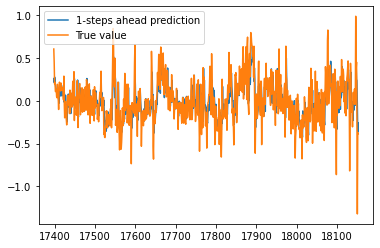

In [127]:
from matplotlib import pyplot as plt
rf_rmse, y_test_rf = time_series_valid_test(X_1aheadonly, y_1aheadonly, 3, "test", [1e-05, 500])
rf_rmse

The best model's parameter is ccp_alpha = 1e-5 and n_estimators = 500, fitting it on the test set, the RMSE is around 0.187

## (d) [2 marks]

It is often useful to check that your model is not worse than a very simple method of prediction. Compute the RMSE of a model that simply predicts the 1-step ahead value of `log_volume` $c_{t+1}$ as the current value $c_t$, and compare this to the best fitting random forest model.

**[Add your solution here]**

In [161]:
def ts_split(ts, feature_steps=1, target_steps=1):
    n_obs = len(ts) - feature_steps - target_steps + 1
    X_log_v = np.array([ts[idx:idx + feature_steps] for idx in range(n_obs)])
    y_log_v = np.array([ts[idx + feature_steps:idx + feature_steps + target_steps]
                  for idx in range(n_obs)])
    return X_log_v[:,:,[3]], y_log_v[:,:,[3]]

X_log_v, y_log_v = ts_split(data, feature_steps=1, target_steps=1)

In [165]:
X_2aheadonly = X_log_v
y_2aheadonly = y_log_v
n_samples1,nx1,ny1 = X_2aheadonly.shape
X_2aheadonly = X_2aheadonly.reshape((n_samples1,nx1*ny1))
n_samples2,nx2,ny2 = y_2aheadonly.shape
y_2aheadonly = y_2aheadonly.reshape((n_samples2,nx2*ny2))

In [167]:
split_ind = int(X.shape[0]*0.8)
X_2aheadonly_train_full, y_2aheadonly_train_full = X_2aheadonly[:split_ind_2], y_2aheadonly[:split_ind_2]
X_test, y_test = X_2aheadonly[split_ind:], y_2aheadonly[split_ind:]

In [168]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_2aheadonly_train_full, y_2aheadonly_train_full.ravel())
y_pred = model.predict(X_test)

In [169]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.2098217358241793

RMSE of a model that simply predicts the 1-step ahead value of log_volume is 0.2098, which is little bit bigger than the best fitting random forest model's RMSE. 

## (e) [2 marks]

Compute the feature importances of the best fitting model. Which feature is the most important and what is its feature importance value?

**[Add your solution here]**

In [219]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestRegressor(n_estimators=500,
                                ccp_alpha = 1e-5,
                                random_state = 42,
                                n_jobs=-1)
forest.fit(X_1aheadonly, y_1aheadonly.ravel())


forest.feature_importances_

array([0.0338198 , 0.05925312, 0.01567865, 0.02981184, 0.06281708,
       0.01206384, 0.03695308, 0.04355261, 0.01099052, 0.03901734,
       0.03701707, 0.01281687, 0.06401678, 0.52835805, 0.01383337])

The features are $a_{t},\dots,a_{t-4},c_{t},\dots,c_{t-4},b_{t},\dots,b_{t-4}$, thus the most important feature is $b$, and its importance value is 0.52835805.

# 2. SVM classification and regression [11 marks]

## (a) [2 marks]

In this question, a SVM is used for classification for the MNIST dataset. The following code loads the MNIST dataset, creates the test set, and to reduce training time, takes a random sample of 2000 points from the full training set to use as your actual training set stored in `X` and `y`. Do not shuffle the data and do not use a standard scaler.

Hint: Reading the solution to Question 9 in the Chapter 5 [Jupyter notebook](https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb) on the textbook website may help with this question.

In [267]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False, cache=True)
mnist.target = mnist.target.astype(np.int8)
X_train = mnist["data"][:60000]
X_test  = mnist["data"][60000:]
y_train = mnist["target"][:60000]
y_test  = mnist["target"][60000:]

In [268]:
from sklearn.model_selection import StratifiedShuffleSplit

N = 2000
split_obj = StratifiedShuffleSplit(n_splits=1,
                               test_size=N/60000, random_state=42)
for other_idx, subsample_idx in split_obj.split(X_train, y_train):
    X = X_train[subsample_idx]
    y = y_train[subsample_idx]

**Task:** Consider fitting the linear SVM classifier (`LinearSVC`) with `max_iter=50000`. For this model, optimize the hyperparameter $C$ using 3-fold CV over the values $10^{-k}$, $k=0,1,\dots,9$, where the performance measure is accuracy. What is the best $C$ and what is the accuracy in this case?

**[Add your solution here]**

In [269]:
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
X_train_new = X
y_train_new = y
lin_clf = LinearSVC(max_iter=50000,random_state=42)
lin_clf.fit(X_train_new, y_train_new)

LinearSVC(max_iter=50000, random_state=42)

In [270]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"C": [pow(10,-1*0), pow(10,-1*1),pow(10,-1*2),
                             pow(10,-1*3), pow(10,-1*4),pow(10,-1*5),
                             pow(10,-1*6), pow(10,-1*7),pow(10,-1*8),pow(10,-1*9)]}
rnd_search_cv = RandomizedSearchCV(lin_clf, param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train_new, y_train_new)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................................. C=1, total=   0.7s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .............................................. C=1, total=   0.7s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.6s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.7s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.6s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.6s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.7s
[CV] C=0.01 ..........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   10.7s finished


RandomizedSearchCV(cv=3, estimator=LinearSVC(max_iter=50000, random_state=42),
                   param_distributions={'C': [1, 0.1, 0.01, 0.001, 0.0001,
                                              1e-05, 1e-06, 1e-07, 1e-08,
                                              1e-09]},
                   random_state=42, verbose=2)

In [271]:
rnd_search_cv.best_estimator_

LinearSVC(C=1e-07, max_iter=50000, random_state=42)

In [272]:
from sklearn.metrics import accuracy_score
param_dist = {"C": [pow(10,-1*7)]}
rnd_search_cv = RandomizedSearchCV(lin_clf, param_dist, verbose=2, cv=3)
rnd_search_cv.fit(X_train_new, y_train_new)
y_pred_2 = rnd_search_cv.predict(X_train_new)
accuracy_score(y_train_new, y_pred_2)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] C=1e-07 .........................................................
[CV] .......................................... C=1e-07, total=   0.1s
[CV] C=1e-07 .........................................................
[CV] .......................................... C=1e-07, total=   0.0s
[CV] C=1e-07 .........................................................
[CV] .......................................... C=1e-07, total=   0.0s


0.926

The best $C = {10}^{-7}$, and in this case the accuracy is 0.926

## (b) [2 marks]

**Task:** Now consider fitting a SVM with a Gaussian RBF kernel and `max_iter=50000`. For this model, optimize the hyperparameters $C$ over the distrbution `uniform(1,10)` and $\gamma$ over the distribution `reciprocal(0.001, 0.1)` with 10 random samples. Again, use 3-fold CV and the performance measure is accuracy. What are the best hyperparameters and what is the accuracy in this case?

**[Add your solution here]**

In [273]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X)

In [283]:
from sklearn.svm import SVC
rbf_kernel_clf = SVC(kernel="rbf", max_iter=50000)
rbf_kernel_clf.fit(X_train_new, y_train_new)
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(rbf_kernel_clf, param_distributions, n_iter=10, 
                                   #scoring = 'accuracy,'
                                   verbose=2, cv=3)
rnd_search_cv.fit(X_train, y_train_new)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=2.9060489549325355, gamma=0.03546640867963035 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=2.9060489549325355, gamma=0.03546640867963035, total=   3.0s
[CV] C=2.9060489549325355, gamma=0.03546640867963035 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV] .. C=2.9060489549325355, gamma=0.03546640867963035, total=   3.0s
[CV] C=2.9060489549325355, gamma=0.03546640867963035 .................
[CV] .. C=2.9060489549325355, gamma=0.03546640867963035, total=   3.0s
[CV] C=6.3956351870026245, gamma=0.001410697586422265 ................
[CV] . C=6.3956351870026245, gamma=0.001410697586422265, total=   1.6s
[CV] C=6.3956351870026245, gamma=0.001410697586422265 ................
[CV] . C=6.3956351870026245, gamma=0.001410697586422265, total=   1.6s
[CV] C=6.3956351870026245, gamma=0.001410697586422265 ................
[CV] . C=6.3956351870026245, gamma=0.001410697586422265, total=   1.5s
[CV] C=3.366641869729813, gamma=0.04939335286997754 ..................
[CV] ... C=3.366641869729813, gamma=0.04939335286997754, total=   3.0s
[CV] C=3.366641869729813, gamma=0.04939335286997754 ..................
[CV] ... C=3.366641869729813, gamma=0.04939335286997754, total=   3.0s
[CV] C=3.366641869729813, gamma=0.04939335286997754 ..................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.1min finished


RandomizedSearchCV(cv=3, estimator=SVC(max_iter=50000),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc5582f69d0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc5582eac70>},
                   verbose=2)

In [284]:
rnd_search_cv.best_estimator_.fit(X_train, y_train_new)

SVC(C=5.635573260606385, gamma=0.0011918276449898906, max_iter=50000)

In [285]:
y_pred_3 = rnd_search_cv.predict(X_train)
accuracy_score(y_train_new, y_pred_3)

0.9995

Here, the best hyperparameters are C=5.635573260606385, gamma=0.0011918276449898906, and the accuracy is 0.9995

## (c) [2 mark]

**Task:** Choose the best model in (a) and (b). Then for this model, evaluate the accuracy on the test set, which is stored in `X_test` and `y_test`.

**[Add your solution here]**

The best model is the SVM with a Gaussian RBF kernel model.

In [280]:
from sklearn.metrics import accuracy_score
X_test_stand = scalar.transform(X_test)
y_pred = rnd_search_cv.predict(X_test_stand)
accuracy_score(y_test, y_pred)

0.9124

Here we get the accuracy of SVM with RBF kernal is 0.9124.

## (d) [3 marks]

Consider the California housing data from Homework 1 using the same training and test set there. The data is obtained using the code below, which comes from Homework 1, and the training set is stored in `X` and `y`. Do not shuffle the data.

Hint: Reading the solution to Question 10 in the Chapter 5 [Jupyter notebook](https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb) on the textbook website may help with this question.

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import os
import tarfile
from six.moves import urllib
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

HOUSING_PATH = os.path.join("datasets", "housing")

def fetch_housing_data(housing_url, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

HOUSING_URL = ("https://raw.githubusercontent.com/ageron/"+
               "handson-ml2/master/datasets/housing/housing.tgz")
fetch_housing_data(HOUSING_URL)
data = load_housing_data()

data["income_cat"] = np.ceil(data["median_income"] / 1.5)
data["income_cat"].where(data["income_cat"] < 5, 5.0, inplace=True)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
X_raw = strat_train_set.drop("median_house_value", axis=1)
y = strat_train_set["median_house_value"].copy()

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_features = X_raw.drop("ocean_proximity", axis=1)
num_attribs = list(num_features)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X = full_pipeline.fit_transform(X_raw)
X_test_raw = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test = full_pipeline.transform(X_test_raw)

**Task:** Consider SVM regression with a Gaussian RBF kernel and a sigmoid kernel with `max_iter=50000`. For both models, use randomized search to choose good hyperparameter values for `C` and `gamma`, and set the arguement `random_state=42`. For both models, optimize the hyperparameters $C$ over the distrbution `uniform(1,10)` and $\gamma$ over the distribution `reciprocal(0.001, 0.1)` with 10 random samples. Again, use 3-fold CV and the performance measure is MSE. What are the best hyperparameters and what is the MSE in this case?

**[Add your solution here]**

In [4]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVC

svm_rbf_clf = SVC(kernel='rbf',max_iter=50000,random_state=42)
svm_rbf_clf.fit(X, y)

svm_sig_clf = SVC(kernel='sigmoid',max_iter=50000,random_state=42)
svm_sig_clf.fit(X, y)

SVC(kernel='sigmoid', max_iter=50000, random_state=42)

In [249]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_rbf_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=8.285434042921391, gamma=0.023838534578000857 .................


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=8.285434042921391, gamma=0.023838534578000857, total= 5.5min
[CV] C=8.285434042921391, gamma=0.023838534578000857 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.5min remaining:    0.0s


[CV] .. C=8.285434042921391, gamma=0.023838534578000857, total=10.3min
[CV] C=8.285434042921391, gamma=0.023838534578000857 .................
[CV] .. C=8.285434042921391, gamma=0.023838534578000857, total= 5.9min
[CV] C=10.695461949946674, gamma=0.010708043206672069 ................
[CV] . C=10.695461949946674, gamma=0.010708043206672069, total= 6.3min
[CV] C=10.695461949946674, gamma=0.010708043206672069 ................
[CV] . C=10.695461949946674, gamma=0.010708043206672069, total= 5.7min
[CV] C=10.695461949946674, gamma=0.010708043206672069 ................
[CV] . C=10.695461949946674, gamma=0.010708043206672069, total= 6.3min
[CV] C=10.207024889110668, gamma=0.0811314013719687 ..................
[CV] ... C=10.207024889110668, gamma=0.0811314013719687, total= 5.7min
[CV] C=10.207024889110668, gamma=0.0811314013719687 ..................
[CV] ... C=10.207024889110668, gamma=0.0811314013719687, total= 5.8min
[CV] C=10.207024889110668, gamma=0.0811314013719687 ..................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 260.1min finished


RandomizedSearchCV(cv=3, estimator=SVC(max_iter=50000, random_state=42),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc5d989b160>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc5d98954c0>},
                   verbose=2)

In [252]:
rnd_search_cv.best_estimator_.fit(X, y)

SVC(C=6.338013772825093, gamma=0.00838166127234242, max_iter=50000,
    random_state=42)

SVM regression with a Gaussian RBF kernel best hyperparameters: C=6.338013772825093, gamma=0.00838166127234242.

In [253]:
sig_search_cv = RandomizedSearchCV(svm_sig_clf, param_distributions, n_iter=10, verbose=2, cv=3)
sig_search_cv.fit(X_train_new, y_train_new)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=2.448115280243586, gamma=0.017040537081944925 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=2.448115280243586, gamma=0.017040537081944925, total=   3.0s
[CV] C=2.448115280243586, gamma=0.017040537081944925 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV] .. C=2.448115280243586, gamma=0.017040537081944925, total=   2.9s
[CV] C=2.448115280243586, gamma=0.017040537081944925 .................
[CV] .. C=2.448115280243586, gamma=0.017040537081944925, total=   2.8s
[CV] C=4.589679817939181, gamma=0.02676376674044744 ..................
[CV] ... C=4.589679817939181, gamma=0.02676376674044744, total=   2.9s
[CV] C=4.589679817939181, gamma=0.02676376674044744 ..................
[CV] ... C=4.589679817939181, gamma=0.02676376674044744, total=   2.9s
[CV] C=4.589679817939181, gamma=0.02676376674044744 ..................
[CV] ... C=4.589679817939181, gamma=0.02676376674044744, total=   2.8s
[CV] C=5.856192492245775, gamma=0.0018525202815017476 ................
[CV] . C=5.856192492245775, gamma=0.0018525202815017476, total=   2.9s
[CV] C=5.856192492245775, gamma=0.0018525202815017476 ................
[CV] . C=5.856192492245775, gamma=0.0018525202815017476, total=   2.9s
[CV] C=5.856192492245775, gamma=0.0018525202815017476 ................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.4min finished


RandomizedSearchCV(cv=3,
                   estimator=SVC(kernel='sigmoid', max_iter=50000,
                                 random_state=42),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc5d989b160>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc5d98954c0>},
                   verbose=2)

In [254]:
sig_search_cv.best_estimator_.fit(X, y)

SVC(C=2.448115280243586, gamma=0.017040537081944925, kernel='sigmoid',
    max_iter=50000, random_state=42)

SVM regression with a sigmoid kernel best hyperparameters: C=2.448115280243586, gamma=0.017040537081944925

In [261]:
y_pred_rnd = rnd_search_cv.best_estimator_.predict(X_test)
mse_rnd = mean_squared_error(y_test,y_pred_rnd)

In [262]:
mse_rnd

34019753706.484013

In [266]:
y_pred_sig = sig_search_cv.best_estimator_.predict(X_test)
mse_sig = mean_squared_error(y_test,y_pred_sig)

In [265]:
mse_sig

34019753706.484013

The RBF kernel with best hyperparameters got MSE = 34019753706.484013 and sigmoid kernel got MSE = 34019753706.484013.

## (e) [2 marks]

**Task:** Choose the best model in (d). Then for this model, evaluate the RMSE on the test set, which is stored in `X_test` and `y_test`.

**[Add your solution here]**

we choose sigmoid kernel since it has smaller MSE. 

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = sig_search_cv.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))

The RMSE of sigmoid kernel is 114752.8087714515

# 3. Voting Classifiers [8 marks]
## (a)  [4 marks]

Consider the MNIST dataset. To save computational time, split it into a smaller training set (the first 5000 observations) and a validation set (the next 1000 observations) as given by the following code.

In [286]:
N = 5000
M = 6000
X_train = mnist["data"][:N]
X_val  = mnist["data"][N:M]
y_train = mnist["target"][:N]
y_val = mnist["target"][N:M]

Do not shuffle the data and do not use a standard scaler. Train the following classifiers on the training set:

(i) a random forest classifier with arguments `n_estimators=100, n_jobs=-1, random_state=42`,

(ii) an extra-trees classifier with arguments `n_estimators=100, n_jobs=-1, random_state=42`,

(iii) an AdaBoost classifier `n_estimators=50, learning_rate=0.2, random_state=42`,

(iv) a gradient boosting classifier using the class `GradientBoostingClassifier()` with arguments `max_depth=2, n_estimators=10, learning_rate=0.25, random_state=42`.

Report the accuracy of each trained classifier on the validation set.

**[Add your solution here]**

In [287]:
#i
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train,y_train)

#ii
from sklearn.ensemble import ExtraTreesClassifier
ext_clf = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=42)
ext_clf.fit(X_train,y_train)
#iii
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=50, learning_rate=0.2, random_state=42)
ada_clf.fit(X_train,y_train)
#iv
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(max_depth=2, n_estimators=10, learning_rate=0.25, random_state=42)
gb_clf.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.25, max_depth=2, n_estimators=10,
                           random_state=42)

In [288]:
from sklearn.metrics import accuracy_score
y_pred_rnd = rnd_clf.predict(X_val)
accuracy_score(y_val, y_pred_rnd)

0.939

The accuracy of random forest classifier on the validation set is 0.939.

In [289]:
y_pred_ext = ext_clf.predict(X_val)
accuracy_score(y_val, y_pred_ext)

0.947

The accuracy of extra-trees classifier on the validation set is 0.947.

In [290]:
y_pred_ada = ada_clf.predict(X_val)
accuracy_score(y_val, y_pred_ada)

0.736

The accuracy of AdaBoost classifier on the validation set is 0.736.

In [291]:
y_pred_gb = gb_clf.predict(X_val)
accuracy_score(y_val, y_pred_gb)

0.834

The accuracy of gradient boosting classifier on the validation set is 0.834.

## (b)  [4 marks]
Train a hard-voting and a soft-voting ensemble classifier based on the models in (a). Evaluate each voting classifier on the validation set. Comment on whether the performance of the ensemble model is better or worse than the individual models in (a) and why that is the case.

**[Add your solution here]**

In [292]:
from sklearn.ensemble import VotingClassifier
eclf_hard = VotingClassifier(estimators=[('rf',rnd_clf), ('et',ext_clf),('ab',ada_clf),('gb',gb_clf)]
                             , voting='hard')
eclf_hard.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_jobs=-1,
                                                     random_state=42)),
                             ('et',
                              ExtraTreesClassifier(n_jobs=-1, random_state=42)),
                             ('ab',
                              AdaBoostClassifier(learning_rate=0.2,
                                                 random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.25,
                                                         max_depth=2,
                                                         n_estimators=10,
                                                         random_state=42))])

In [293]:
y_pred_hard = eclf_hard.predict(X_val)
accuracy_score(y_val, y_pred_hard)

0.923

In [294]:
from sklearn.ensemble import VotingClassifier
eclf_soft = VotingClassifier(estimators=[('rf',rnd_clf), ('et',ext_clf),('ab',ada_clf),('gb',gb_clf)]
                             , voting='soft')
eclf_soft.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_jobs=-1,
                                                     random_state=42)),
                             ('et',
                              ExtraTreesClassifier(n_jobs=-1, random_state=42)),
                             ('ab',
                              AdaBoostClassifier(learning_rate=0.2,
                                                 random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.25,
                                                         max_depth=2,
                                                         n_estimators=10,
                                                         random_state=42))],
                 voting='soft')

In [295]:
y_pred_soft = eclf_soft.predict(X_val)
accuracy_score(y_val, y_pred_soft)

0.926

The hard voting classifier has 0.923 accuracy and soft voting classifier has 0.926 accuracy.
The hard voting and soft voting classifier accuracy worse than RandomForestClassifier and ExtraTreesClassifier, but voting classifier perform better than AdaBoostClassifier and GradientBoostingClassifier.

# 4. Stacking [9 marks]

We continue with the setting of Question 3. The training set, validation set and test set are the same. In Question 3, we have used predetermined rules (that is, hard-voting and soft-voting) to build the ensemble prediction. **Stacking** is an ensemble method in which you train a model (called a **blender**) to aggregate the result of each predictor into an ensemble prediction.

Hint: Reading the subsection "Stacking" in Chapter 7 of the textbook and the solution to Question 9 in the Chapter 7 [Jupyter notebook](https://github.com/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb) on the textbook website may help with this question.

## (a)  [3 marks]

For each of the four classifiers in Question 3(a), make 5000 clean predictions on the training set with 3-fold cross validation using `sklearn.model_selection.cross_val_predict()`. You should end up with four predictions per observation. Print at least the first 5 rows of `pred`. Next, apply one-hot encoding to `pred` since these predictions are class labels.

**[Add your solution here]**

In [296]:
from sklearn.model_selection import cross_val_predict
y_train_pred_rf = cross_val_predict(rnd_clf,X_train, y_train, cv=3)

y_train_pred_et = cross_val_predict(ext_clf,X_train, y_train, cv=3)

y_train_pred_ab = cross_val_predict(ada_clf,X_train, y_train, cv=3)

y_train_pred_gb = cross_val_predict(gb_clf,X_train, y_train, cv=3)

In [297]:
pred = []
for k in range(5000):   
    pred.append([])
    pred[k].append(y_train_pred_rf[k])
    pred[k].append(y_train_pred_et[k])
    pred[k].append(y_train_pred_ab[k])
    pred[k].append(y_train_pred_gb[k])
pred[:5] 

[[5, 5, 3, 3], [0, 0, 5, 0], [4, 4, 4, 4], [1, 1, 1, 1], [9, 9, 9, 9]]

In [298]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
pred = onehot.fit_transform(pred)

In [299]:
print(pred[:5])

  (0, 5)	1.0
  (0, 15)	1.0
  (0, 23)	1.0
  (0, 33)	1.0
  (1, 0)	1.0
  (1, 10)	1.0
  (1, 25)	1.0
  (1, 30)	1.0
  (2, 4)	1.0
  (2, 14)	1.0
  (2, 24)	1.0
  (2, 34)	1.0
  (3, 1)	1.0
  (3, 11)	1.0
  (3, 21)	1.0
  (3, 31)	1.0
  (4, 9)	1.0
  (4, 19)	1.0
  (4, 29)	1.0
  (4, 39)	1.0


## (b) [3 marks]
Use the predictions in (a) as features and the actual label of the observations as the target. Train a random forest classifier on the training set with the parameters `n_estimators=100, random_state=42`.  This classifier is a blender. 

**[Add your solution here]**

In [300]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
blender = rf.fit(pred,y_train)
blender.oob_score_

0.9268

## (c) [3 marks]

Obtain the predictions of the blender on the validation set by feeding predictions on the validation set from the four classifiers in Question 3(a) into the blender trained in Question 4(b). Do not retrain the blender. These are called stacking predictions. Report the accuracy of your stacking predictions on the validation set and compare this to the results in Question 3(b).

**[Add your solution here]**

In [301]:
rnd_clf.fit(X_train,y_train)
rnd_pred = rnd_clf.predict(X_val)

ext_clf.fit(X_train,y_train)
et_pred = ext_clf.predict(X_val)

ada_clf.fit(X_train,y_train)
ab_pred = ada_clf.predict(X_val)

gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_val)

In [302]:
pred_c = []
for k in range(1000):   
    pred_c.append([])
    pred_c[k].append(rnd_pred[k])
    pred_c[k].append(et_pred[k])
    pred_c[k].append(ab_pred[k])
    pred_c[k].append(gb_pred[k])

In [303]:
pred_c[:5]

[[7, 7, 7, 7], [3, 3, 3, 3], [4, 4, 9, 9], [6, 6, 6, 6], [1, 1, 1, 1]]

In [304]:
my_pred = onehot.fit_transform(pred_c)
pred = blender.predict(my_pred)
accuracy = accuracy_score(y_val,pred)
print(accuracy)

0.947


The accuracy of your stacking predictions on the validation set is 0.947. It is litte bit better than the result in question 3b.